In [2]:
from google.colab import drive
drive.mount('/content/drive')
% cd '/content/drive/My Drive/freq_bias'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/freq_bias


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cm as mcm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
import seaborn as sns
from matplotlib import ticker
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set(style="whitegrid", font_scale=1.5)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

In [5]:
d = []
for j in [1,2]:
  xs = []
  for i in [7, 28, 36, 47, 98]:
    x = np.load("results_acc/injection_acc_{}_8_dir_trial{}.npy".format(i, j))
    xs.append(x)
  old_data = np.stack(xs, axis=1)

  data = np.zeros((6,5,7))
  data[0,:,:]=old_data[1,:,:]
  data[1,:,:]=old_data[0,:,:]
  for i in range(2,6):
    data[i,:,:] = old_data[i,:,:]

  data = data[:5,:,:]

  new_data = np.zeros((5,5,7))
  new_data[:,:,0] = data[:,:,4]
  new_data[:,:,1] = data[:,:,5]
  new_data[:,:,2] = data[:,:,6]
  new_data[:,:,3] = data[:,:,3]
  new_data[:,:,4] = data[:,:,0]
  new_data[:,:,5] = data[:,:,2]
  new_data[:,:,6] = data[:,:,1]
  d.append(new_data)
d = np.array(d)

In [ ]:
d.shape

(2, 5, 5, 7)

In [ ]:
avgs = np.zeros((5,5))
devs = np.zeros((5,5))
for k in range(5):

  k1 = data[k,:,:]

  for f in range(5):
    kf = k1[f,:]
    avg = np.mean(kf)
    dev = np.std(kf)
    avgs[k,f] = avg
    devs[k,f] = dev

# mean

In [ ]:
# races = [
#       'Black',
#       'Indian',
#       'Middle Eastern',
#       'Southeast Asian',
#       'East Asian',
#       'Latino_Hispanic',
#       'White',
#       ]
kernels= [3, 5, 7, 11, 13]

example_df = pd.DataFrame.from_dict({kernels[i]:avgs[i,:] for i in range(5)})
example_df

,3,5,7,11,13
0,0.698493,0.692461,0.638930,0.640165,0.655998
1,0.844333,0.777774,0.741293,0.855360,0.842442
2,0.785679,0.689752,0.747352,0.868165,0.871554
3,0.777868,0.750599,0.878484,0.901145,0.910625
4,0.829776,0.826582,0.899903,0.907480,0.910479


# std dev

In [ ]:
races = [
      'Black',
      'Indian',
      'Middle Eastern',
      'Southeast Asian',
      'East Asian',
      'Latino_Hispanic',
      'White',
      ]
# kernels= [3, 5, 7, 11, 13]

# example_df = pd.DataFrame.from_dict({kernels[i]:devs[i,:] for i in range(5)})
# example_df

In [7]:
to_test = []
for k in range(2):
  data = d[k]
  curr_data = data
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      for r in range(data.shape[2]):
        race = np.zeros(4)
        race[0] = curr_data[i,j, r]
        race[1] = i
        race[2] = j
        race[3] = r
        to_test.append(race)
to_test = np.array(to_test)

In [ ]:
test_dict1 = {"k{}f{}".format(i//5+1, i%5+1):all_d[0][:,i+1] for i in range(25)}
test_dict2 = {"k{}f{}".format(i//5+1, i%5+1):all_d[1][:,i+1] for i in range(25)}

In [ ]:
for i in range(25):
  new = np.hstack([test_dict1["k{}f{}".format(i//5+1, i%5+1)],test_dict2["k{}f{}".format(i//5+1, i%5+1)]])
  test_dict1["k{}f{}".format(i//5+1, i%5+1)] = new

In [ ]:
test_dict1["y"] = np.hstack([all_d[0][:,0], all_d[1][:,0]])

In [ ]:
to_test = []
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    for k in range(data.shape[2]):
      race = np.zeros(18)
      race[0] = data[i,j,k]
      race[i+1] = 1
      race[j+6] = 1
      race[k+11] = 1
      to_test.append(race)
to_test = np.array(to_test)

In [ ]:
to_test.shape

(50, 11)

# Generating Data

In [14]:
# example_df = pd.DataFrame.from_dict({"y": to_test[:,0], "k1": to_test[:,1], "k2": to_test[:,2], "k3": to_test[:,3], "k4": to_test[:,4], "k5": to_test[:,5], 
#                                      "f1": to_test[:,6], "f2": to_test[:,7], "f3": to_test[:,8], "f4": to_test[:,9], "f5": to_test[:,10],})
example_df = pd.DataFrame.from_dict({"y": to_test[:,0], "k": to_test[:,1],"f":to_test[:,2], "r":to_test[:,3]})
# example_df = pd.DataFrame.from_dict(test_dict1)
example_df

,y,k,f,r
0,0.594662,0.0,0.0,0.0
1,0.593054,0.0,0.0,1.0
2,0.739983,0.0,0.0,2.0
3,0.593640,0.0,0.0,3.0
4,0.592476,0.0,0.0,4.0
...,...,...,...,...
345,0.942029,4.0,4.0,2.0
346,0.914488,4.0,4.0,3.0
347,0.912226,4.0,4.0,4.0
348,0.922159,4.0,4.0,5.0


# Regression

In [15]:
def Visulize_model_prediction(model):
    sns.set(font_scale=2, style="whitegrid")
    plt.figure(figsize=(8, 8))
    # ax1 = plt.subplot(1, 7, j)
    plt.scatter(model._results.model.endog, model.predict())
    x_linspace = np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 2)
    plt.plot(x_linspace, x_linspace, color="#000000")
    plt.gca().set_aspect("equal")
    plt.xlabel(r"$y$")
    plt.ylabel(r"$\hat{y}$")

In [16]:
model = smf.ols("y ~ k+C(r)", example_df,).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     11.72
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.23e-13
Time:                        12:52:47   Log-Likelihood:                 303.94
No. Observations:                 350   AIC:                            -591.9
Df Residuals:                     342   BIC:                            -561.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6660      0.016     40.436      

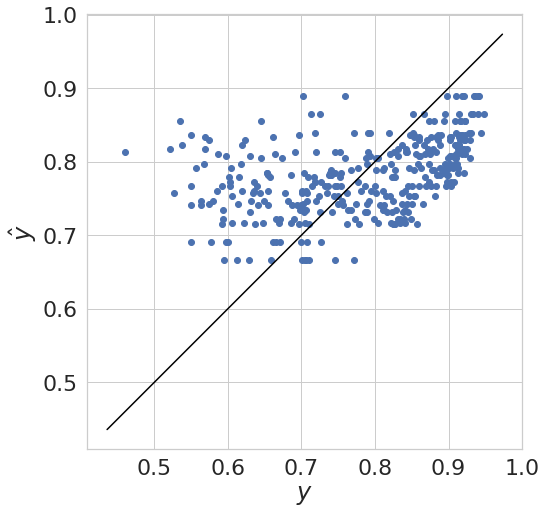

In [17]:
Visulize_model_prediction(model)

In [ ]:
co = []
for r in range(7):
  to_test = []
  for k in range(2):
    data = d[k]
    curr_data = data[:,:,r]
    for i in range(data.shape[0]):
      for j in range(data.shape[1]):
        race = np.zeros(11)
        race[0] = curr_data[i,j]
        race[i+1] = 1
        race[6+j] = 1
        to_test.append(race)
  to_test = np.array(to_test)
  example_df = pd.DataFrame.from_dict({"y": to_test[:,0], "k1": to_test[:,1], "k2": to_test[:,2], "k3": to_test[:,3], "k4": to_test[:,4], "k5": to_test[:,5], 
                                     "f1": to_test[:,6], "f2": to_test[:,7], "f3": to_test[:,8], "f4": to_test[:,9], "f5": to_test[:,10],})
  model = smf.ols("y ~ k1+k2+k3+k4+k5 + f1+f2+f3+f4+f5", example_df,).fit()
  print(model.summary())
  co.append(list(model.params[1:6]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     11.49
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.25e-08
Time:                        10:07:42   Log-Likelihood:                 76.835
No. Observations:                  50   AIC:                            -135.7
Df Residuals:                      41   BIC:                            -118.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5119      0.006     88.167      0.0

In [ ]:
race_dict = {races[i]:co[i] for i in range(7)}
df = pd.DataFrame.from_dict(race_dict)
df

,Black,Indian,Middle Eastern,Southeast Asian,East Asian,Latino_Hispanic,White
0,0.069043,0.079616,0.116032,0.092745,0.094365,0.099824,0.099139
1,0.031613,0.039970,0.036493,0.028505,0.029537,0.050044,0.031819
2,0.109453,0.114348,0.126859,0.114300,0.111481,0.122172,0.116043
3,0.146014,0.160285,0.152690,0.152816,0.149850,0.150797,0.148968
4,0.155760,0.166510,0.167098,0.163204,0.162202,0.151802,0.162931


In [ ]:
list(model.params[1:6])

[0.06904318524430249,
 0.031613017646537185,
 0.10945286867074593,
 0.14601401081848003,
 0.1557595105081139]

In [ ]:
plt.figure(figsize=(8*7, 8))
model = smf.ols("y ~ k1+k2+k3+k4+k5 + f1+f2+f3+f4+f5", example_df,).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     11.49
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.25e-08
Time:                        09:46:39   Log-Likelihood:                 76.835
No. Observations:                  50   AIC:                            -135.7
Df Residuals:                      41   BIC:                            -118.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5119      0.006     88.167      0.000       0.500       0.524
k1             0.0690      0.016      4.236      0.000       0.036       0.102
k2             0.0316      0.016      1.940      0.059      -0.001       0.065
k3             0.1095      0.016      6.716      0.000       0.077       0.142
k4             0.1460      0.016      8.959      0.000       0.113       0.179
k5             0.1558      0.016      9.557      0.000       0.123       0.189
f1            -0.0016      0.016     -0.098      0.922      -0.035       0.031
f2             0.1037      0.016      6.362      0.000       0.071       0.137
f3             0.0823      0.016      5.048      0.000       0.049       0.115
f4             0.1452      0.016      8.910      0.000       0.112       0.178
f5             0.1823      0.016     11.187      0.000       0.149       0.215
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.980
Skew:                          -0.331   Prob(JB):                        0.612
Kurtosis:                       3.183   Cond. No.                     3.11e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Figure size 4032x576 with 0 Axes>

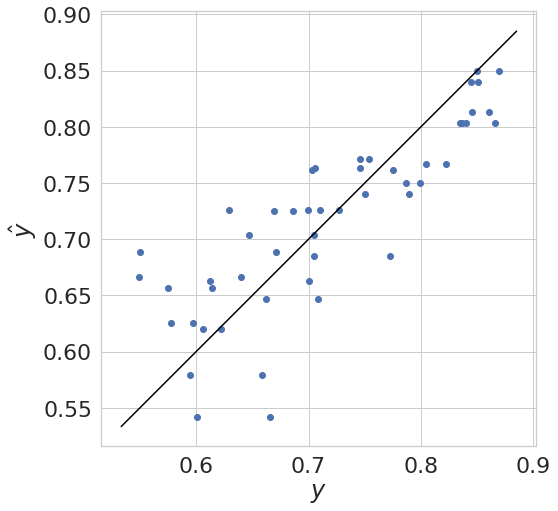

In [ ]:
Visulize_model_prediction(model)

In [ ]:
f = "y~"
for i in range(24):
  f+="k{}f{}".format(i//5+1, i%5+1)
  f+="+"
f+="k5f5"

In [ ]:
f

'y~k1f1+k1f2+k1f3+k1f4+k1f5+k2f1+k2f2+k2f3+k2f4+k2f5+k3f1+k3f2+k3f3+k3f4+k3f5+k4f1+k4f2+k4f3+k4f4+k4f5+k5f1+k5f2+k5f3+k5f4+k5f5'

In [ ]:
model = smf.ols('y~k1f1+k1f2+k1f3+k1f4+k1f5+k2f1+k2f2+k2f3+k2f4+k2f5+k3f1+k3f2+k3f3+k3f4+k3f5+k4f1+k4f2+k4f3+k4f4+k4f5+k5f1+k5f2+k5f3+k5f4+k5f5 - 1', example_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     11.90
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.66e-08
Time:                        14:13:13   Log-Likelihood:                 104.85
No. Observations:                  50   AIC:                            -159.7
Df Residuals:                      25   BIC:                            -111.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
k1f1           0.6668      0.030     22.436      0.000       0.606       0.728
k1f2           0.8415      0.030     28.313      0.000       0.780       0.903
k1f3           0.7641      0.030     25.708      0.000       0.703       0.825
k1f4           0.7570      0.030     25.469      0.000       0.696       0.818
k1f5           0.8197      0.030     27.579      0.000       0.758       0.881
k2f1           0.6712      0.030     22.585      0.000       0.610       0.732
k2f2           0.7193      0.030     24.200      0.000       0.658       0.780
k2f3           0.6725      0.030     22.626      0.000       0.611       0.734
k2f4           0.6303      0.030     21.208      0.000       0.569       0.692
k2f5           0.8192      0.030     27.563      0.000       0.758       0.880
k3f1           0.6703      0.030     22.552      0.000       0.609       0.731
k3f2           0.7376      0.030     24.818      0.000       0.676       0.799
k3f3           0.7408      0.030     24.925      0.000       0.680       0.802
k3f4           0.8863      0.030     29.821      0.000       0.825       0.948
k3f5           0.8986      0.030     30.234      0.000       0.837       0.960
k4f1           0.6139      0.030     20.656      0.000       0.553       0.675
k4f2           0.8263      0.030     27.802      0.000       0.765       0.888
k4f3           0.8469      0.030     28.494      0.000       0.786       0.908
k4f4           0.9059      0.030     30.481      0.000       0.845       0.967
k4f5           0.9052      0.030     30.456      0.000       0.844       0.966
k5f1           0.6151      0.030     20.697      0.000       0.554       0.676
k5f2           0.8562      0.030     28.808      0.000       0.795       0.917
k5f3           0.8795      0.030     29.591      0.000       0.818       0.941
k5f4           0.9086      0.030     30.572      0.000       0.847       0.970
k5f5           0.9086      0.030     30.572      0.000       0.847       0.970
==============================================================================
Omnibus:                       10.578   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               29.904
Skew:                          -0.000   Prob(JB):                     3.21e-07
Kurtosis:                       6.789   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

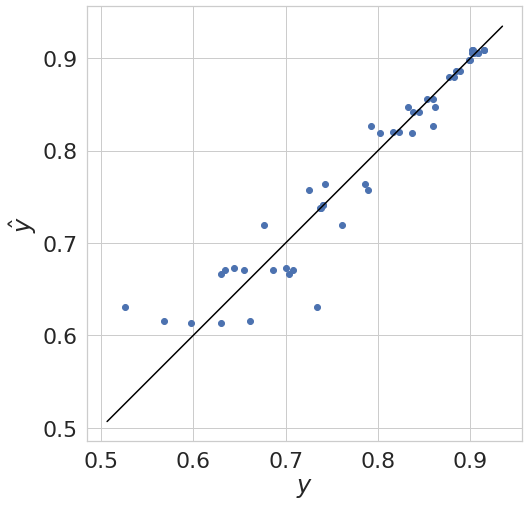

In [ ]:
Visulize_model_prediction(model)

In [ ]:
model = smf.ols("y ~ C(x2)", example_df, ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.066
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           0.000782
Time:                        15:33:48   Log-Likelihood:                 171.71
No. Observations:                 175   AIC:                            -329.4
Df Residuals:                     168   BIC:                            -307.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7811      0.019     42.187      0.000       0.745       0.818
C(x2)[T.1.0]     0.0184      0.026      0.704      0.482      -0.033       0.070
C(x2)[T.2.0]     0.0440      0.026      1.680      0.095      -0.008       0.096
C(x2)[T.3.0]     0.0069      0.026      0.263      0.793      -0.045       0.059
C(x2)[T.4.0]    -0.0483      0.026     -1.844      0.067      -0.100       0.003
C(x2)[T.5.0]     0.0242      0.026      0.922      0.358      -0.028       0.076
C(x2)[T.6.0]     0.0711      0.026      2.716      0.007       0.019       0.123
==============================================================================
Omnibus:                       25.621   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.681
Skew:                          -0.435   Prob(JB):                      0.00291
Kurtosis:                       2.080   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

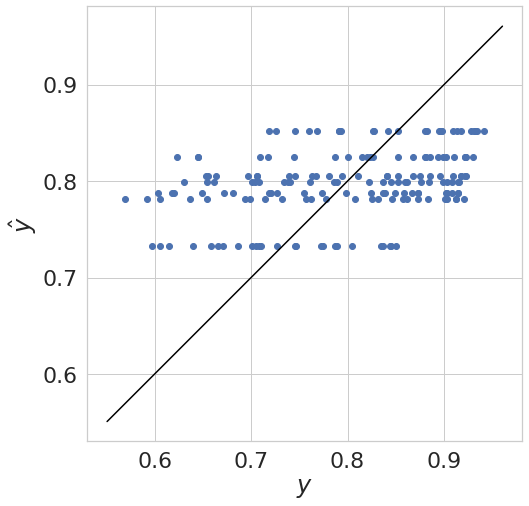

In [ ]:
Visulize_model_prediction(model)

# Ordinal Regression

In [ ]:
! pip install --upgrade --no-deps statsmodels

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels

from statsmodels.miscmodels.ordinal_model import OrderedModel

In [10]:
mod_prob = OrderedModel(example_df['y'],
            example_df[['k', 'f', 'r']],
            distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 5.454856
         Iterations: 53
         Function evaluations: 55
         Gradient evaluations: 55


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -1909.2
Model:                   OrderedModel   AIC:                             4492.
Method:            Maximum Likelihood   BIC:                             5793.
Date:                Fri, 22 Apr 2022                                         
Time:                        12:51:20                                         
No. Observations:                 350                                         
Df Residuals:                      13                                         
Df Model:                         337                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
k                                          0.3807      0.042      9.050      0.000       0.298       0.463
f                                          0.6112      0.045     13.580      0.000       0.523       0.699
r                                          0.0633      0.027      2.346      0.019       0.010       0.116
0.46035805626598464/0.5216300940438872    -1.0406      0.326     -3.189      0.001      -1.680      -0.401
0.5216300940438872/0.5262126408623224     -1.5825      0.988     -1.601      0.109      -3.519       0.354
0.5262126408623224/0.5348399246704332     -2.0671      0.991     -2.085      0.037      -4.010      -0.124
0.5348399246704332/0.5371024734982333     -2.3893      0.991     -2.412      0.016      -4.331      -0.448
0.5371024734982333/0.5493482309124768     -2.5892      0.991     -2.612      0.009      -4.532      -0.646
0.5493482309124768/0.5498034076015728     -2.7406      0.992     -2.762      0.006      -4.685      -0.796
0.5498034076015728/0.5498432601880878     -2.8643      0.993     -2.885      0.004      -4.810      -0.918
0.5498432601880878/0.5499689633767846     -2.9942      0.994     -3.012      0.003      -4.942      -1.046
0.5499689633767846/0.5573667711598747     -3.1218      0.995     -3.139      0.002      -5.071      -1.173
0.5573667711598747/0.5630094043887147     -3.2122      0.995     -3.230      0.001      -5.162      -1.263
0.5630094043887147/0.5639575971731449     -3.2638      0.995     -3.281      0.001      -5.213      -1.314
0.5639575971731449/0.5674911660777385     -3.3287      0.995     -3.344      0.001      -5.279      -1.378
0.5674911660777385/0.5688388045075943     -3.4009      0.995     -3.417      0.001      -5.352      -1.450
0.5688388045075943/0.5692789968652038     -3.4588      0.996     -3.474      0.001      -5.410      -1.507
0.5692789968652038/0.5743879472693032     -3.5193      0.996     -3.534      0.000      -5.471      -1.568
0.5743879472693032/0.5747982619490999     -3.5694      0.996     -3.584      0.000      -5.521      -1.618
0.5747982619490999/0.5772811918063314     -3.6078      0.996     -3.623      0.000      -5.560      -1.656
0.5772811918063314/0.5802120141342756     -3.6460      0.996     -3.660      0.000      -5.598      -1.694
0.5802120141342756/0.5851900393184797     -3.6751      0.996     -3.689      0.000      -5.627      -1.723
0.5851900393184797/0.5871559633027523     -3.7106      0.996     -3.724      0.000      -5.663      -1.758
0.5871559633027523/0.5918495297805643     -3.7520      0.996     -3.766      0.000      -5.705      -1.799
0.5918495297805643/0.5924764890282131     -3.7769      0.996     -3.791      0.000      -5.730      -1.824
0.5924764890282131/0.5930537352555701     -3.7902      0.996     -3.804      0.000      -5.743      -1.837
0.5930537352555701/0.5936395759717314     -3.7923      0.99

# Diagnosing Models

Refer to https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate
[https://medium.com/evidentebm/linear-regression-using-statsmodels-d0db5fef16bb](https://medium.com/evidentebm/linear-regression-using-statsmodels-d0db5fef16bb)
1. $R^2 \to  1$ better
1. F-stats: $> 100$
1. Coefficients: $t > 1.96$, $p < 0.05$
1. Omnibus, Jarque-Bera: Test of the skewness and kurtosis of the residual.
- - Omnibus $\to 0$ meaning normally distributed
- - JB $\to 0$ meaning normally distributed
- - Skew $= 0$ for normal distribution
- - Kurtosis $= 3$ for normal distribution
5. Durbin-Watson: Test for homoscedasticity, 1 - 2 for being homoscedastic 
6. Condition Number: Measures the sensitivity of a function's output as compared to its input. We expect $< 30$. Otherwise, there might be multicollinearity in data.